In [1]:
# 데이터 출처 : https://www.kaggle.com/datasets/m1relly/heart-attack-prediction

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('./heart_attack_prediction_dataset.csv')

In [4]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [5]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [6]:
df['systolic blood pressure'] = df['Blood Pressure'].str.split('/').str[0]

In [7]:
df['diastolic blood pressure'] = df['Blood Pressure'].str.split('/').str[1]

In [8]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,systolic blood pressure,diastolic blood pressure
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [9]:
df.drop('Blood Pressure', axis=1, inplace=True)

In [10]:
df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,systolic blood pressure,diastolic blood pressure
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,61,1,1,1,0,1,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,QSV6764,28,Female,120,73,1,0,0,1,0,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,XKA5925,47,Male,250,105,0,1,1,1,1,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,EPE6801,36,Male,178,60,1,0,1,0,0,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [11]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk', 'systolic blood pressure',
       'diastolic blood pressure'],
      dtype='object')

In [12]:
df.iloc[ : , 9: ]

,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,systolic blood pressure,diastolic blood pressure
0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [13]:
df.drop('Diet', axis=1, inplace=True)

In [14]:
df.drop('Income', axis=1, inplace=True)

In [15]:
df.drop('Country', axis=1, inplace=True)

In [16]:
df.drop('Continent', axis=1, inplace=True)

In [17]:
df.drop('Hemisphere', axis=1, inplace=True)

In [18]:
#df.columns = ['환자 ID', '나이', '성별', '콜레스트롤 수치', '심박수', '당뇨병 유무', '가족력', '흡연 유무', '비만 유무', '음주 유무', '주 운동 시간', '과거 심장질환 유무', '복용 약물 유무', '스트레스 수준', '하루 앉아있는 시간', 'BMI', '중성지방 수치', '주당 신체 활동 일수 ', '수면 시간', '심장마비 위험', '수축기 혈압', '이완기 혈압']

In [19]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use',
       'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'systolic blood pressure',
       'diastolic blood pressure'],
      dtype='object')

In [20]:
df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,systolic blood pressure,diastolic blood pressure
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,0,9,6.615001,31.251233,286,0,6,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,0,1,4.963459,27.194973,235,1,7,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,1,9,9.463426,28.176571,587,4,4,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,0,9,7.648981,36.464704,378,3,4,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,0,6,1.514821,21.809144,231,1,5,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,61,1,1,1,0,1,...,1,8,10.806373,19.655895,67,7,7,0,94,76
8759,QSV6764,28,Female,120,73,1,0,0,1,0,...,0,8,3.833038,23.993866,617,4,9,0,157,102
8760,XKA5925,47,Male,250,105,0,1,1,1,1,...,0,5,2.375214,35.406146,527,4,4,1,161,75
8761,EPE6801,36,Male,178,60,1,0,1,0,0,...,1,5,0.029104,27.294020,114,2,8,0,119,67


C:\Users\hope\AppData\Local\anaconda3\envs\st_heart_attack\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


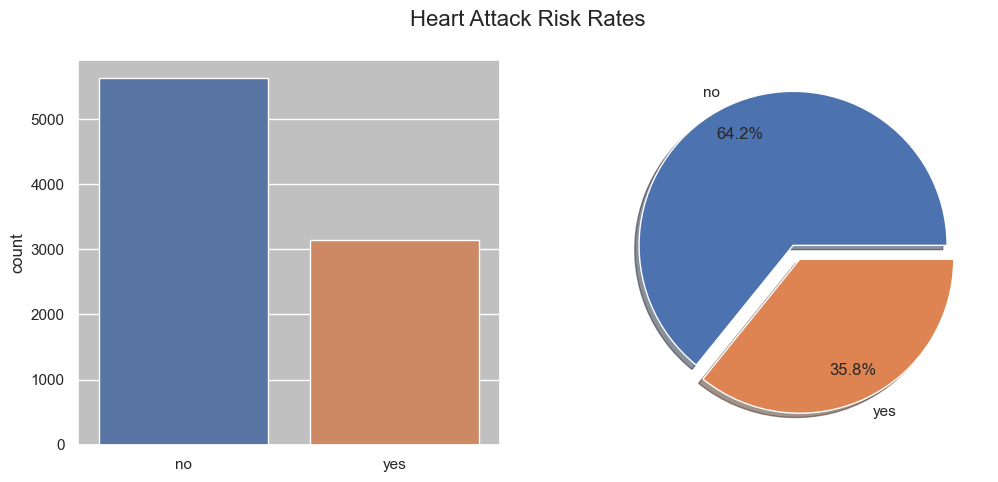

In [21]:
# 심장마비 비율

plt.figure(figsize=(12,5))
sb.set(rc={'axes.facecolor':'c0c0c0', 'figure.facecolor':'lightblue'})
plt.subplot(1, 2, 1)
sb.barplot(x=['no', 'yes'], y=df["Heart Attack Risk"].value_counts())
plt.subplot(1, 2, 2)
plt.pie(x=df["Heart Attack Risk"].value_counts(), autopct="%.1f%%", pctdistance=0.8,
        labels= ['no', 'yes'], shadow=True, explode=[0.05,0.05])
plt.suptitle("Heart Attack Risk Rates", fontsize=16)
plt.show()

In [22]:
df.head(2)

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,systolic blood pressure,diastolic blood pressure
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,0,9,6.615001,31.251233,286,0,6,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,0,1,4.963459,27.194973,235,1,7,0,165,93


In [23]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use',
       'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'systolic blood pressure',
       'diastolic blood pressure'],
      dtype='object')

In [24]:
# 성별 비율

C:\Users\hope\AppData\Local\anaconda3\envs\st_heart_attack\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


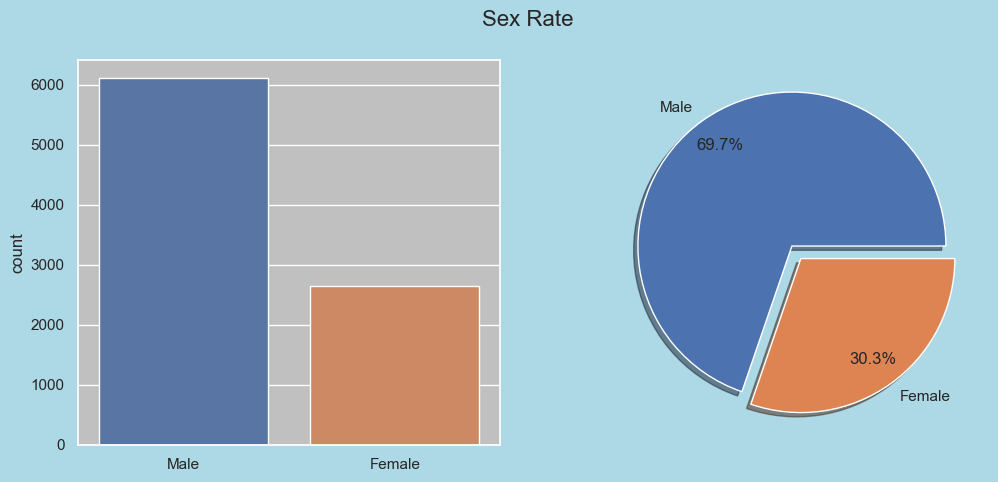

In [25]:
plt.figure(figsize=(12,5))
sb.set(rc={'axes.facecolor':'c0c0c0', 'figure.facecolor':'lightblue'})
plt.subplot(1, 2, 1)
sb.barplot(x=['Male', 'Female'], y=df["Sex"].value_counts())
plt.subplot(1, 2, 2)
plt.pie(x=df["Sex"].value_counts(), autopct="%.1f%%", pctdistance=0.8,
        labels= ['Male', 'Female'], shadow=True, explode=[0.05,0.05])
plt.suptitle("Sex Rate", fontsize=16)
plt.show()

In [33]:
# Encoding

In [34]:
data = df.copy()

In [38]:
le = LabelEncoder()

In [44]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use',
       'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'systolic blood pressure',
       'diastolic blood pressure'],
      dtype='object')

In [42]:
data['Sex'] = data['Sex'].agg(le.fit_transform)

In [46]:
data = data[['Heart Attack Risk', 'Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
        'systolic blood pressure', 'diastolic blood pressure', 'Sedentary Hours Per Day', 'BMI',
        'Triglycerides', 'Stress Level', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',
        'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption','Previous Heart Problems',
        'Medication Use', 'Sex']]

In [48]:
data.head(1)

,Heart Attack Risk,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,systolic blood pressure,diastolic blood pressure,Sedentary Hours Per Day,BMI,Triglycerides,...,Physical Activity Days Per Week,Sleep Hours Per Day,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Medication Use,Sex
0,0,67,208,72,4.168189,158,88,6.615001,31.251233,286,...,0,6,0,0,1,0,0,0,0,1


In [49]:
heart_attack_corr = data.corr()["Heart Attack Risk"]
heart_attack_corr = heart_attack_corr.drop("Heart Attack Risk", axis=0).sort_values(ascending=False)

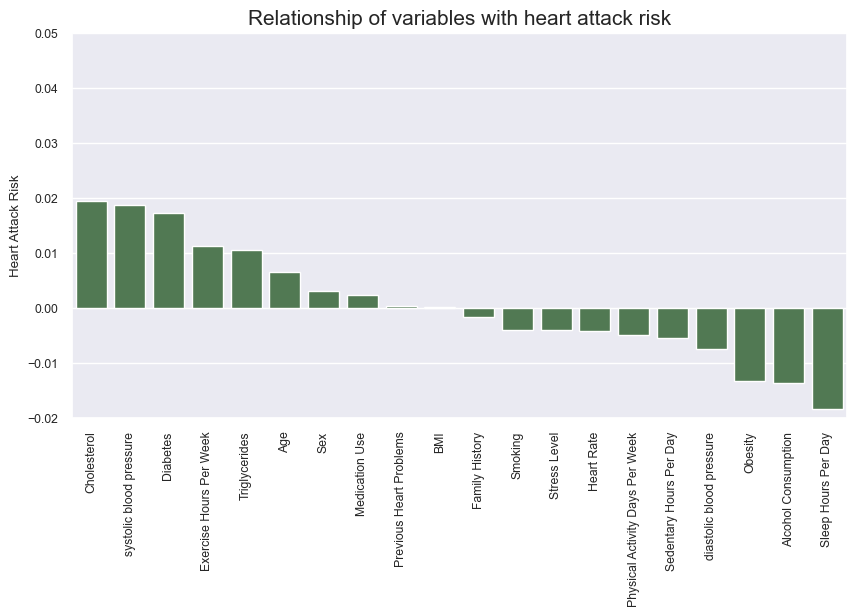

In [50]:
plt.figure(figsize=(10,5))
sb.set(font_scale=0.8)
sb.barplot(x=heart_attack_corr.index, y=heart_attack_corr, color="#4a804d")
plt.xticks(rotation=90)
plt.ylim(-0.02, 0.05)
plt.title("Relationship of variables with heart attack risk", fontsize=15)
plt.show()

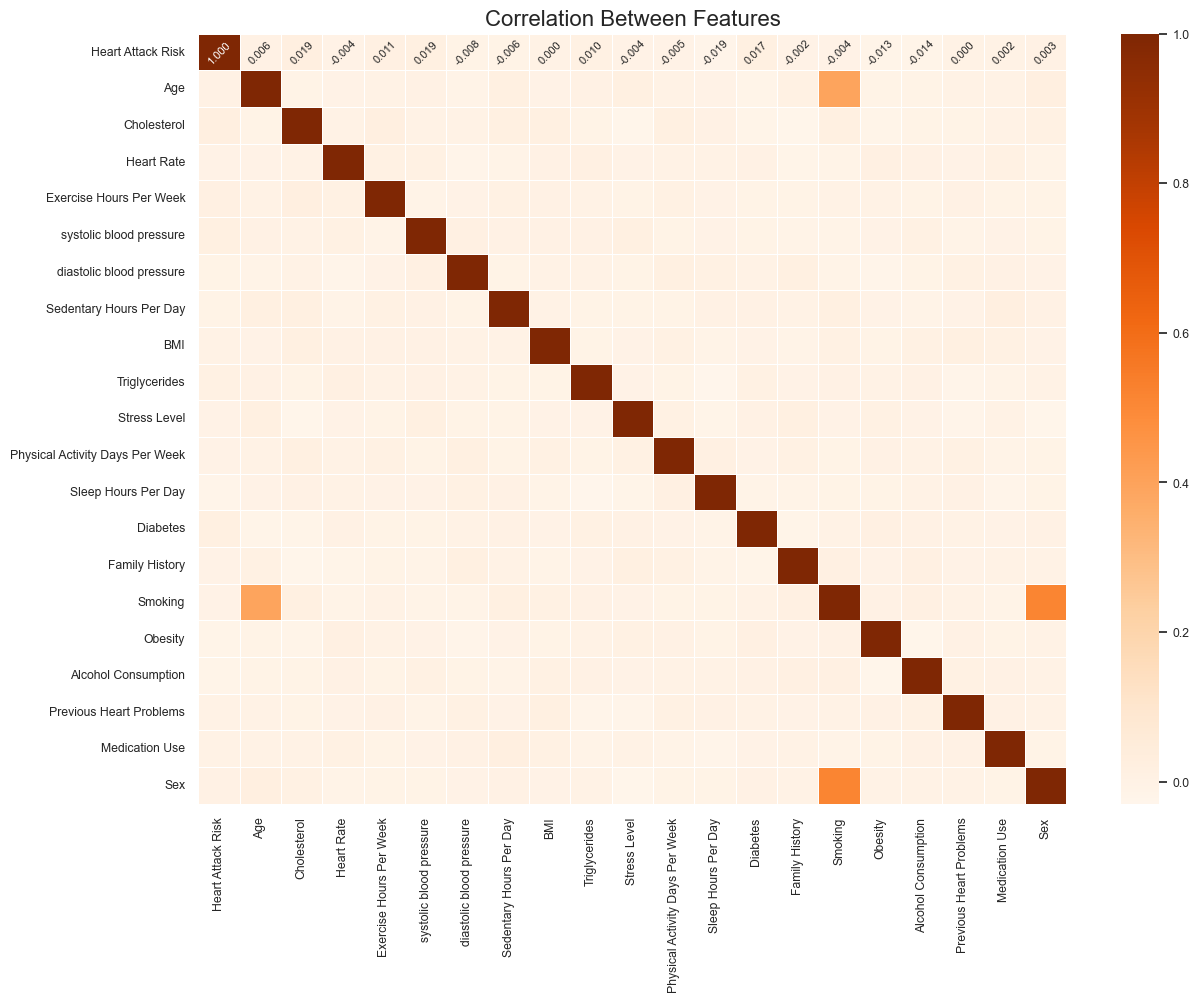

In [51]:
plt.figure(figsize=(14,10))
sb.heatmap(data.corr(), annot=True, linewidths=0.4, fmt='.3f', cmap="Oranges", annot_kws={'size': 8, 'rotation': 45})
plt.title("Correlation Between Features", fontsize=16)
plt.show()

In [56]:
# 데이터 나누기
y = data["Heart Attack Risk"]
X = data.drop("Heart Attack Risk", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
model = LinearSVC()

In [65]:
model

LinearSVC()

In [69]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

C:\Users\hope\AppData\Local\anaconda3\envs\st_heart_attack\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [70]:
cm

array([[1687,    0],
       [ 942,    0]], dtype=int64)

In [71]:
accuracy

0.6416888550779765

In [73]:
# 정확도 0.64

In [75]:
import joblib
joblib.dump(model, 'heart_attack_prediction.pkl')

['heart_attack_prediction.pkl']